In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

/var/folders/ft/l4d711gj74v0qqmmd2m75b5w0000gn/T/ipykernel_17586/2459430964.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20')


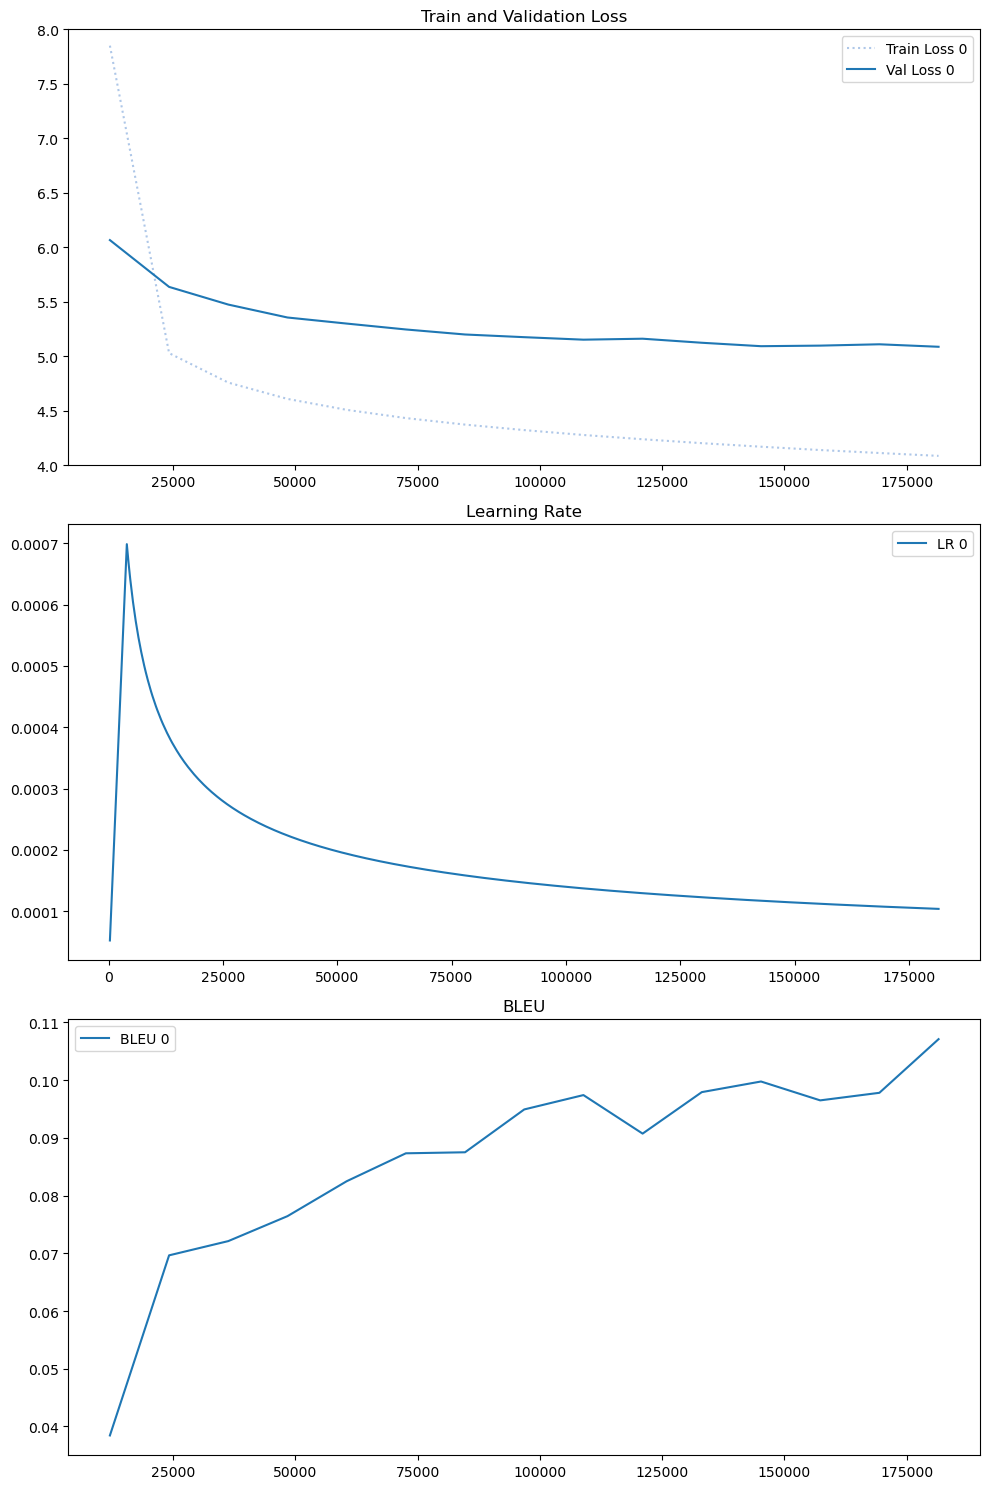

In [6]:
def draw_plot(directory='Final Training/', plot_lr=True, plot_bleu=True, use_step_loss=False):
    count_versions = len(glob.glob(directory + '/run-version_*-tag-train_loss_epoch.csv'))
    count_subplot = 1 + plot_lr + plot_bleu
    fig, axs = plt.subplots(count_subplot, 1, figsize=(10, 15))

    color_palette = plt.cm.get_cmap('tab20')

    for i in range(count_versions):
        train_loss_epoch = pd.read_csv(directory + f'run-version_{i}-tag-train_loss_epoch.csv') if not use_step_loss else pd.read_csv(directory + f'run-version_{i}-tag-train_loss_step.csv')
        val_loss = pd.read_csv(directory + f'run-version_{i}-tag-val_loss.csv')
        lr = pd.read_csv(directory + f'run-version_{i}-tag-lr-AdamW_pg1.csv')

        if use_step_loss:
            # there are way to much steps. take the mean of every 5 steps
            train_loss_epoch = train_loss_epoch.groupby(np.arange(len(train_loss_epoch))//10).mean()
        


        color1 = color_palette(i*2)
        color2 = color_palette(i*2+1)
        axs[0].plot(train_loss_epoch['Step'], train_loss_epoch['Value'], label=f'Train Loss {i}', linestyle=':', color=color2)
        axs[0].plot(val_loss['Step'], val_loss['Value'], label=f'Val Loss {i}', color=color1)
        axs[0].set_title('Train and Validation Loss')
        axs[0].set_ylim(4, 8)
        axs[0].legend()

        if plot_lr:
            axs[1].plot(lr['Step'], lr['Value'], label=f'LR {i}')
            axs[1].set_title('Learning Rate')
            axs[1].legend()

        if plot_bleu:
            bleu = pd.read_csv(directory + f'run-version_{i}-tag-bleu.csv')
            axs[2].plot(bleu['Step'], bleu['Value'], label=f'BLEU {i}')
            axs[2].set_title('BLEU')
            axs[2].legend()

    # save as pdf in the same directory
    # tight layout
    plt.tight_layout()
    plt.savefig(directory + 'LR_plot.pdf', bbox_inches='tight')

draw_plot(use_step_loss=False)